In [2]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

In this notebook we will use a different criteria to determine the critical temperature of the system. In this case we will use the value of the temperature at which the height of every curve is the half of the total height. We will explain what this means later.

# Main variables

In [3]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = [2**i for i in range(10)]

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

modelsfolder, resultsfolder = auxLib.folders(directory=os.path.join(os.getcwd(), 
                                                                    'Half_of_height_criteria' ,
                                                                    datetime.now().strftime('%Y-%m-%d'))) 

# The method

We will load the predictions of 2024-08-17 and will calculate the temperature with them. To do so, I will make a copy of the predictions in our current directory ('resultsfolder') and then we will work with them.

In [4]:
from scipy.optimize import curve_fit # We will use scipy to determine the critical temperature

Here is how

In [25]:
prediction = pd.read_csv(resultsfolder+f'/predictions_1.csv', header=0).to_numpy(float)

temperature, para, ferro, neel, stripe = prediction[1:].T

def linear_function(x, a, b):
    return a*x + b

index_temp_1 = np.where(temperature == 1)[0][0]

index_temp_3 = np.where(temperature == 3)[0][0]

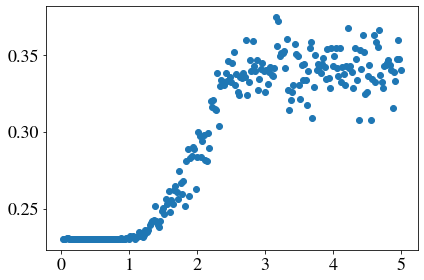

In [26]:
plt.scatter(temperature, para)

We make a linear fit on (0,1) and another linear fit on (3,5)

In [36]:
popt_first, pcov_first = curve_fit(linear_function, temperature[:index_temp_1+1], para[:index_temp_1+1])
popt_last, pcov_last = curve_fit(linear_function, temperature[index_temp_3:], para[index_temp_3:])

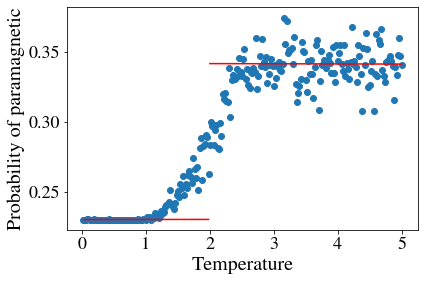

In [60]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First Segment Fit (Temp=1)')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last Segment Fit')

plt.xlabel('Temperature')
plt.ylabel('Probability of paramagnetic')

plt.show()

In [61]:
print(f'Lower bound: {popt_first[1]}')
print(f'Higher bound: {popt_last[1]}')

half_of_height = (popt_first[1]+popt_last[1])/2

closest_index = np.abs(para - half_of_height).argmin()
closest_x = temperature[closest_index]

print(f'Half of height: {half_of_height}')
print(f'Critical temperature: {closest_x}')

Lower bound: 0.23045453119447548
Higher bound: 0.3416399303588701
Half of height: 0.28604723077667277
Critical temperature: 1.92


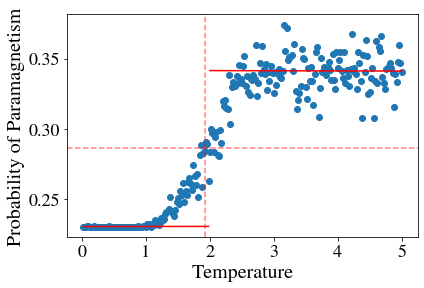

In [62]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First Segment Fit (Temp=1)')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last Segment Fit')

plt.axhline(y=half_of_height, color = 'red', linestyle = '--', alpha = 0.5)

plt.axvline(x=closest_x, color = 'red', linestyle = '--', alpha = 0.5)

plt.xlabel('Temperature')
plt.ylabel('Probability of Paramagnetism')

plt.show()

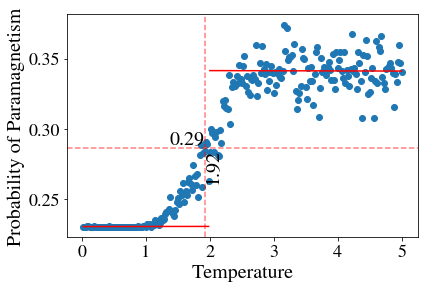

In [63]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First fit')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last fit')

# Add horizontal and vertical lines
plt.axhline(y=half_of_height, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=closest_x, color='red', linestyle='--', alpha=0.5)

# Display the value of half_of_height on the y-axis
plt.text(closest_x, half_of_height, f'{half_of_height:.2f}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
plt.text(closest_x, half_of_height, f'{closest_x:.2f}', color='black', 
        verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=20)

# Add labels and legend
plt.xlabel('Temperature')
plt.ylabel('Probability of Paramagnetism')

# Adjust legend position
#plt.legend(loc='upper left')  # Change the location as needed

# Show the plot
plt.show()


# Critical temperature per prediction

Lower bound: 0.23045453119447548
Higher bound: 0.3416399303588701
Half of height: 0.28604723077667277
Critical temperature: 1.92
Lower bound: 0.31593685949890343
Higher bound: 0.22043377550907628
Half of height: 0.2681853175039899
Critical temperature: 1.86
Lower bound: 0.13489516290340053
Higher bound: 0.2114827519171424
Half of height: 0.17318895741027146
Critical temperature: 1.94
Lower bound: 0.3187130875616688
Higher bound: 0.2264429943665408
Half of height: 0.27257804096410476
Critical temperature: 2.18


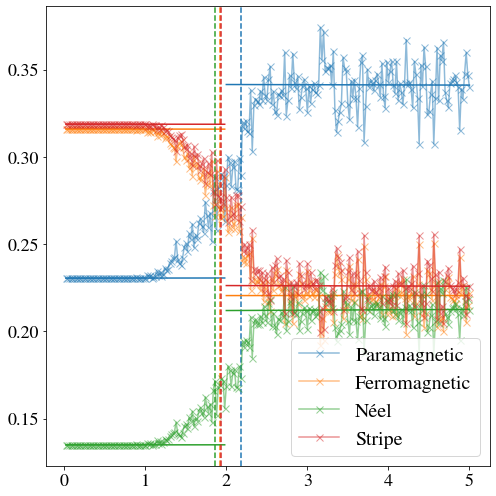

In [84]:
prediction = pd.read_csv(resultsfolder+f'/predictions_1.csv', header=0).to_numpy(float)

temperature, para, ferro, neel, stripe = prediction[1:].T

def linear_function(x, a, b):
    return a*x + b

index_temp_1 = np.where(temperature == 1)[0][0]

index_temp_3 = np.where(temperature == 3)[0][0]

linear_fitting = []
tc = []

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(7, 7))

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

for index, feature in enumerate([para, ferro, neel, stripe]):
    color = colors[index]
    
    plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

    popt_first, pcov_first = curve_fit(linear_function, temperature[:index_temp_1+1], feature[:index_temp_1+1])
    popt_last, pcov_last = curve_fit(linear_function, temperature[index_temp_3:], feature[index_temp_3:])

    plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

    plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
    plt.axvline(x=closest_x, color = color, linestyle = '--')
    
    print(f'Lower bound: {popt_first[1]}')
    print(f'Higher bound: {popt_last[1]}')
    
    half_of_height = (popt_first[1]+popt_last[1])/2
    closest_index = np.abs(feature - half_of_height).argmin()
    closest_x = temperature[closest_index]
    
    print(f'Half of height: {half_of_height}')
    print(f'Critical temperature: {closest_x}')
    linear_fitting.append([popt_first[1], popt_last[1]])
    tc.append(closest_x)
    
plt.legend()
plt.show()

# Doing this for every DNN

In [6]:
def constant_func(x, b):
    return np.full_like(x, b)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

Prediction for 1 neurons in hidden layer
Lower bound (Paramagnetic): 0.2304790532588958
Higher bound (Paramagnetic): 0.3415475908433352
Half of height (Paramagnetic): 0.2860133220511155
Critical temperature (Paramagnetic): 1.92
Lower bound (Ferromagnetic): 0.3159137707948685
Higher bound (Ferromagnetic): 0.22014210299948211
Half of height (Ferromagnetic): 0.2680279368971753
Critical temperature (Ferromagnetic): 1.86
Lower bound (Néel): 0.13490991562604898
Higher bound (Néel): 0.2127298496500306
Half of height (Néel): 0.1738198826380398
Critical temperature (Néel): 1.94
Lower bound (Stripe): 0.31869690120220184
Higher bound (Stripe): 0.22557978127348022
Half of height (Stripe): 0.27213834123784103
Critical temperature (Stripe): 2.18


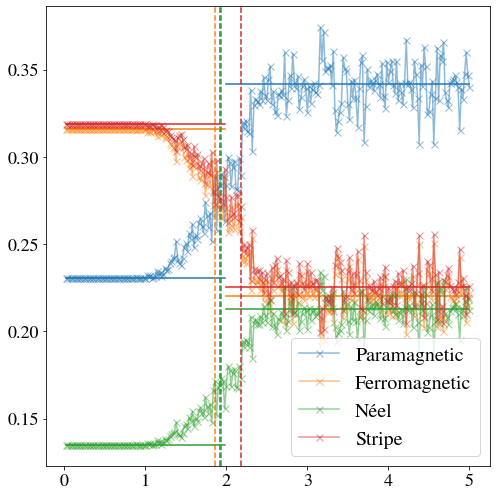

Prediction for 2 neurons in hidden layer
Lower bound (Paramagnetic): 0.2385979130847532
Higher bound (Paramagnetic): 0.43626204717270034
Half of height (Paramagnetic): 0.33742998012872677
Critical temperature (Paramagnetic): 1.98
Lower bound (Ferromagnetic): 0.443905840514877
Higher bound (Ferromagnetic): 0.30229937971654786
Half of height (Ferromagnetic): 0.37310261011571244
Critical temperature (Ferromagnetic): 1.98
Lower bound (Néel): 0.03154704272747036
Higher bound (Néel): 0.06744769098711945
Half of height (Néel): 0.0494973668572949
Critical temperature (Néel): 2.06
Lower bound (Stripe): 0.2859497308715503
Higher bound (Stripe): 0.19399116962387952
Half of height (Stripe): 0.2399704502477149
Critical temperature (Stripe): 1.98


<Figure size 432x288 with 0 Axes>

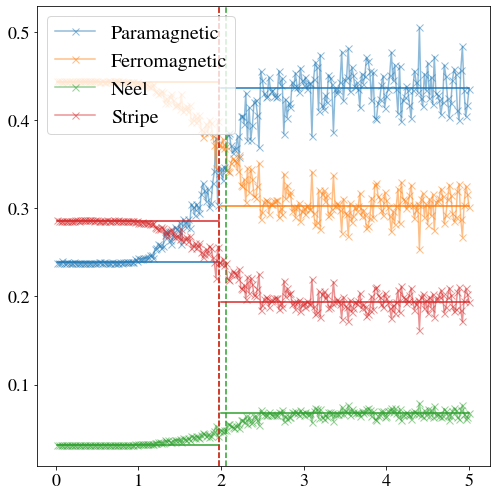

Prediction for 4 neurons in hidden layer
Lower bound (Paramagnetic): 0.10442385092377658
Higher bound (Paramagnetic): 0.44873635383093047
Half of height (Paramagnetic): 0.27658010237735353
Critical temperature (Paramagnetic): 2.12
Lower bound (Ferromagnetic): 0.5466379916658048
Higher bound (Ferromagnetic): 0.27914968863264533
Half of height (Ferromagnetic): 0.4128938401492251
Critical temperature (Ferromagnetic): 2.12
Lower bound (Néel): 0.02734120789915318
Higher bound (Néel): 0.11374558771164478
Half of height (Néel): 0.07054339780539898
Critical temperature (Néel): 2.12
Lower bound (Stripe): 0.32159620761723373
Higher bound (Stripe): 0.15836844140408082
Half of height (Stripe): 0.23998232451065726
Critical temperature (Stripe): 2.12


<Figure size 432x288 with 0 Axes>

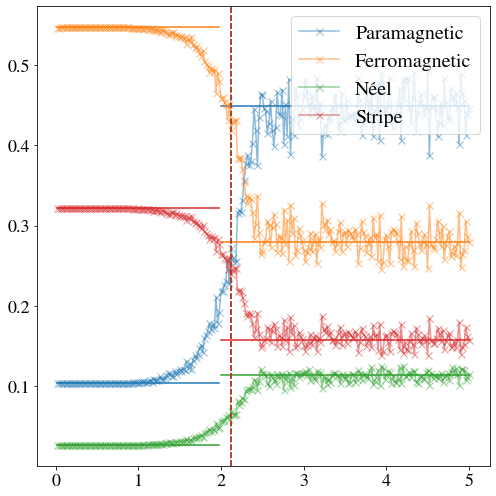

Prediction for 8 neurons in hidden layer
Lower bound (Paramagnetic): 0.00122362242313097
Higher bound (Paramagnetic): 0.5981194832736954
Half of height (Paramagnetic): 0.2996715528484132
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.998328987359997
Higher bound (Ferromagnetic): 0.1440978149554334
Half of height (Ferromagnetic): 0.5712134011577152
Critical temperature (Ferromagnetic): 2.36
Lower bound (Néel): 0.000445345454500006
Higher bound (Néel): 0.12512442834821397
Half of height (Néel): 0.06278488690135699
Critical temperature (Néel): 2.38
Lower bound (Stripe): 1.3482268354891811e-06
Higher bound (Stripe): 0.13265827122856585
Half of height (Stripe): 0.06632980972770067
Critical temperature (Stripe): 2.48


<Figure size 432x288 with 0 Axes>

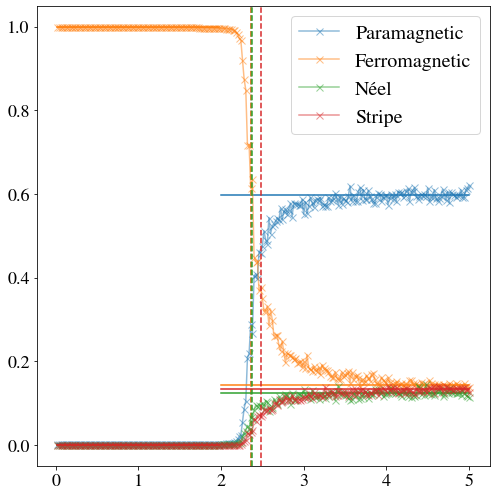

Prediction for 16 neurons in hidden layer
Lower bound (Paramagnetic): 5.660534961862136e-06
Higher bound (Paramagnetic): 0.7916512664622082
Half of height (Paramagnetic): 0.395828463498585
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999936592578887
Higher bound (Ferromagnetic): 0.09943448766577367
Half of height (Ferromagnetic): 0.5497140734618312
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 5.0578884369656416e-08
Higher bound (Néel): 0.049742767986978076
Half of height (Néel): 0.024871409282931224
Critical temperature (Néel): 2.4
Lower bound (Stripe): 1.1225506724137007e-09
Higher bound (Stripe): 0.05917146794438832
Half of height (Stripe): 0.029585734533469497
Critical temperature (Stripe): 2.56


<Figure size 432x288 with 0 Axes>

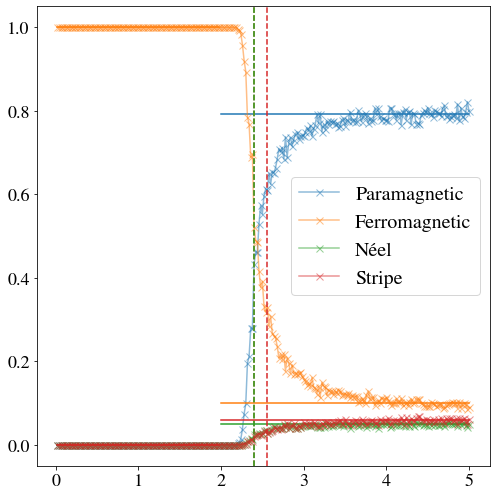

Prediction for 32 neurons in hidden layer
Lower bound (Paramagnetic): 3.1460602394872757e-06
Higher bound (Paramagnetic): 0.8504195423683942
Half of height (Paramagnetic): 0.42521134421431683
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9999924910068513
Higher bound (Ferromagnetic): 0.061869101779424396
Half of height (Ferromagnetic): 0.5309307963931378
Critical temperature (Ferromagnetic): 2.36
Lower bound (Néel): 5.061123583800516e-06
Higher bound (Néel): 0.042718355779218786
Half of height (Néel): 0.021361708451401295
Critical temperature (Néel): 2.38
Lower bound (Stripe): 6.13661692285007e-11
Higher bound (Stripe): 0.0449930040838874
Half of height (Stripe): 0.022496502072626785
Critical temperature (Stripe): 2.58


<Figure size 432x288 with 0 Axes>

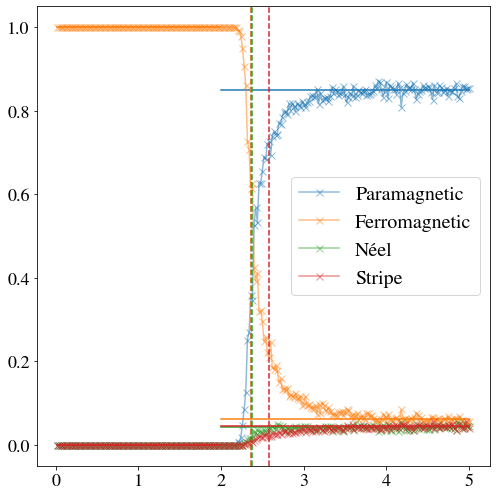

Prediction for 64 neurons in hidden layer
Lower bound (Paramagnetic): 3.566973441593216e-07
Higher bound (Paramagnetic): 0.8362356225645944
Half of height (Paramagnetic): 0.41811798963096924
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999986886978148
Higher bound (Ferromagnetic): 0.06197038161403987
Half of height (Ferromagnetic): 0.5309845351559274
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 7.532738575122272e-09
Higher bound (Néel): 0.03856179147164662
Half of height (Néel): 0.019280899502192597
Critical temperature (Néel): 2.48
Lower bound (Stripe): 1.1955342132941028e-10
Higher bound (Stripe): 0.0632321975520449
Half of height (Stripe): 0.03161609883579916
Critical temperature (Stripe): 2.56


<Figure size 432x288 with 0 Axes>

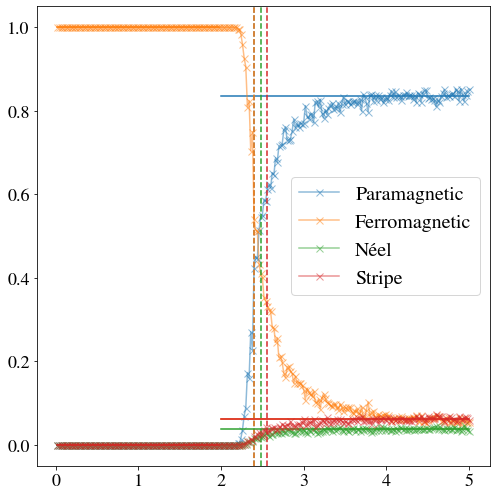

Prediction for 128 neurons in hidden layer
Lower bound (Paramagnetic): 1.0941274667857205e-05
Higher bound (Paramagnetic): 0.9141932562283906
Half of height (Paramagnetic): 0.45710209875152924
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999882483482361
Higher bound (Ferromagnetic): 0.034667122303502884
Half of height (Ferromagnetic): 0.5173276853258695
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 5.535468465822651e-09
Higher bound (Néel): 0.01764696262854737
Half of height (Néel): 0.008823484082007917
Critical temperature (Néel): 2.46
Lower bound (Stripe): 5.501509123817532e-09
Higher bound (Stripe): 0.03349264656147055
Half of height (Stripe): 0.016746326031489837
Critical temperature (Stripe): 2.46


<Figure size 432x288 with 0 Axes>

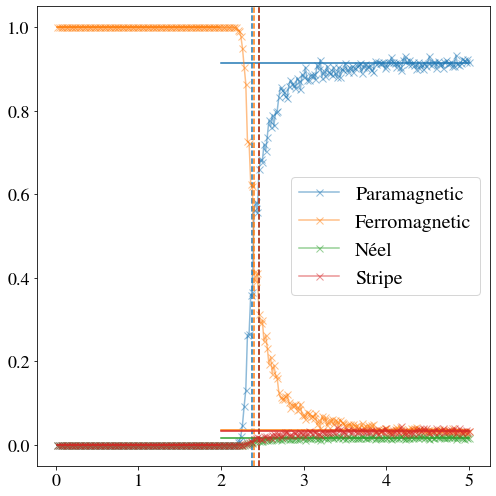

Prediction for 256 neurons in hidden layer
Lower bound (Paramagnetic): 0.000574844843940756
Higher bound (Paramagnetic): 0.9944513732311773
Half of height (Paramagnetic): 0.497513109037559
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.999379582405089
Higher bound (Ferromagnetic): 0.0025339250787151935
Half of height (Ferromagnetic): 0.5009567537419021
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 1.9077763390669137e-05
Higher bound (Néel): 0.0014429462506275748
Half of height (Néel): 0.000731012007009122
Critical temperature (Néel): 2.26
Lower bound (Stripe): 2.6612228866724758e-05
Higher bound (Stripe): 0.0015717593921055746
Half of height (Stripe): 0.0007991858104861497
Critical temperature (Stripe): 2.26


<Figure size 432x288 with 0 Axes>

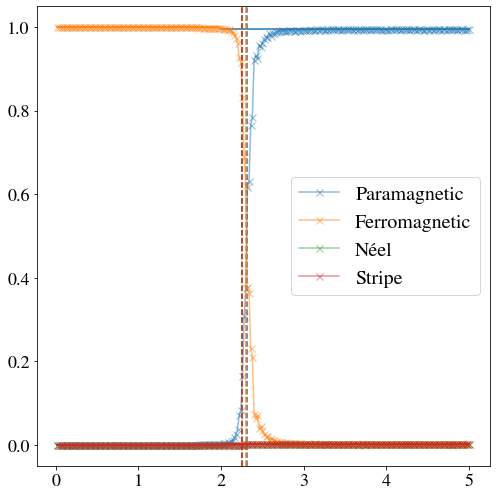

Prediction for 512 neurons in hidden layer
Lower bound (Paramagnetic): 0.000443491203477556
Higher bound (Paramagnetic): 0.987348974919759
Half of height (Paramagnetic): 0.4938962330616183
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9994534778594959
Higher bound (Ferromagnetic): 0.002679504691531796
Half of height (Ferromagnetic): 0.5010664912755138
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 7.391567283775658e-05
Higher bound (Néel): 0.0024147350273664436
Half of height (Néel): 0.0012443253501021002
Critical temperature (Néel): 2.22
Lower bound (Stripe): 2.8442096918297457e-05
Higher bound (Stripe): 0.0075568045014697644
Half of height (Stripe): 0.003792623299194031
Critical temperature (Stripe): 2.32


<Figure size 432x288 with 0 Axes>

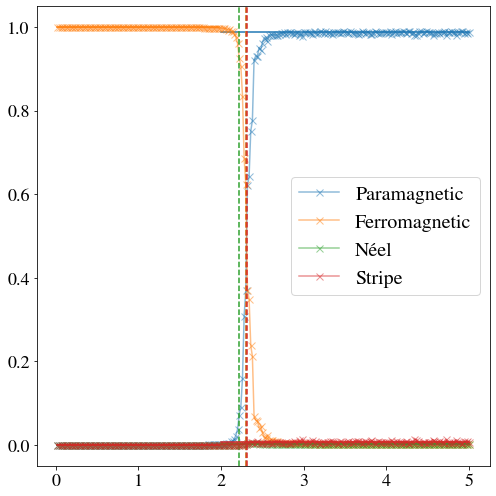

<Figure size 432x288 with 0 Axes>

In [8]:
critical_temperature = []

for neuron in neurons:
	prediction = pd.read_csv(resultsfolder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
	print(f'Prediction for {neuron} neurons in hidden layer')

	temperature, para, ferro, neel, stripe = prediction[1:].T

	index_temp_1 = np.where(temperature == 1)[0][0]

	index_temp_3 = np.where(temperature == 4)[0][0]
	
	plt.figure(figsize=(7, 7))

	tc = []

	for index, feature in enumerate([para, ferro, neel, stripe]):
		color = colors[index]
		
		plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

		popt_first, pcov_first = curve_fit(constant_func, temperature[:index_temp_1+1], feature[:index_temp_1+1])
		popt_last, pcov_last = curve_fit(constant_func, temperature[index_temp_3:], feature[index_temp_3:])

		plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
			constant_func(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

		plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
			constant_func(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
		
		print(f'Lower bound ({names[index]}): {popt_first[0]}')
		print(f'Higher bound ({names[index]}): {popt_last[0]}')
		
		half_of_height = (popt_first[0]+popt_last[0])/2
		
		closest_index = np.abs(feature - half_of_height *np.ones_like(feature)).argmin()

		closest_x = temperature[closest_index]

		plt.axvline(x=closest_x, color = color, linestyle = '--')
		
		print(f'Half of height ({names[index]}): {half_of_height}')
		print(f'Critical temperature ({names[index]}): {closest_x}')
		tc.append(closest_x)
		
	plt.legend()
	plt.show()
	plt.savefig(resultsfolder+f'/critical_temperature_{neuron}.png', dpi=300, bbox_inches='tight')

	mean_temperature = np.mean(tc)

	critical_temperature.append(mean_temperature)

In [9]:
critical_temperature

[1.975, 2.0, 2.12, 2.395, 2.44, 2.42, 2.46, 2.425, 2.285, 2.285]

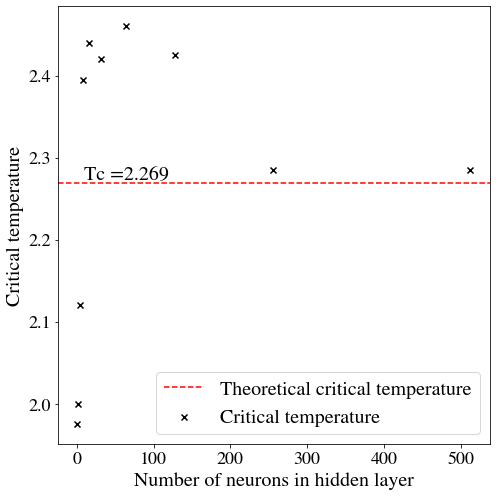

In [17]:
plt.figure(figsize=(7, 7))

plt.scatter(neurons, critical_temperature, marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Critical temperature')

plt.text(120, 2.269, rf'Tc ={2.269}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)

plt.legend()
plt.show()